In [1]:
import os
import tensorflow as tf
# Load compressed models from tensorflow_hub
os.environ['TFHUB_MODEL_LOAD_FORMAT'] = 'COMPRESSED'

In [2]:
import IPython.display as display

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12, 12)
mpl.rcParams['axes.grid'] = False

import numpy as np
import PIL.Image
import time
import functools

In [3]:
def tensor_to_image(tensor):
  tensor = tensor*255
  tensor = np.array(tensor, dtype=np.uint8)
  if np.ndim(tensor)>3:
    assert tensor.shape[0] == 1
    tensor = tensor[0]
  return PIL.Image.fromarray(tensor)

In [4]:
content_path = tf.keras.utils.get_file('YellowLabradorLooking_new.jpg', 'https://storage.googleapis.com/download.tensorflow.org/example_images/YellowLabradorLooking_new.jpg')
style_path = tf.keras.utils.get_file('kandinsky5.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/Vassily_Kandinsky%2C_1913_-_Composition_7.jpg')

In [5]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
  img = tf.image.convert_image_dtype(img, tf.float32)

  shape = tf.cast(tf.shape(img)[:-1], tf.float32)
  long_dim = max(shape)
  scale = max_dim / long_dim

  new_shape = tf.cast(shape * scale, tf.int32)

  img = tf.image.resize(img, new_shape)
  img = img[tf.newaxis, :]
  return img

In [6]:
def imshow(image, title=None):
  if len(image.shape) > 3:
    image = tf.squeeze(image, axis=0)

  plt.imshow(image)
  if title:
    plt.title(title)

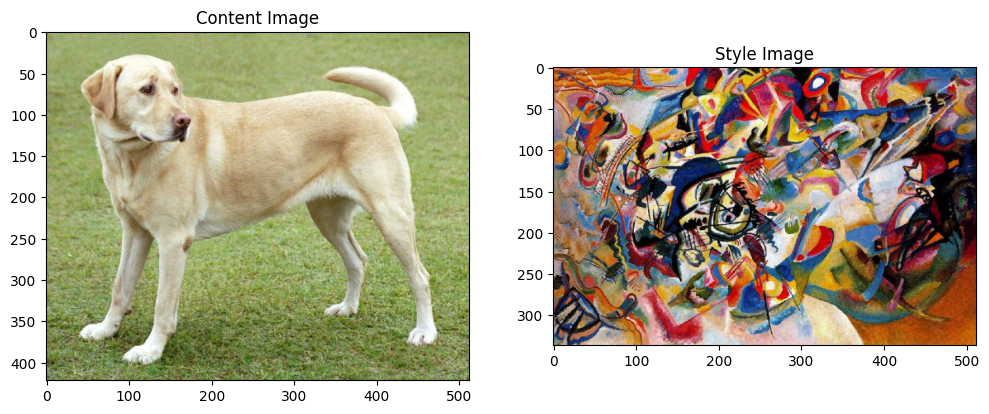

In [7]:
content_image = load_img(content_path)
style_image = load_img(style_path)

plt.subplot(1, 2, 1)
imshow(content_image, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_image, 'Style Image')

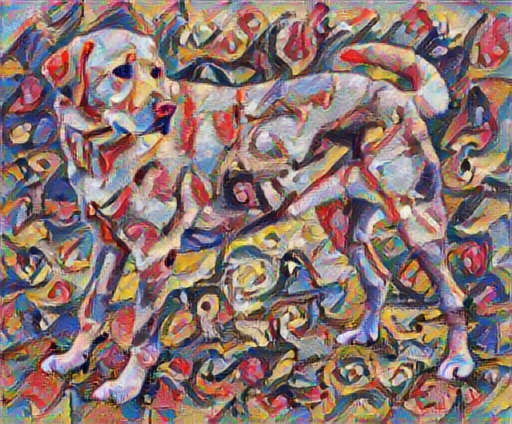

In [8]:
import tensorflow_hub as hub
hub_model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')
stylized_image = hub_model(tf.constant(content_image), tf.constant(style_image))[0]
tensor_to_image(stylized_image)

In [9]:
x = tf.keras.applications.vgg19.preprocess_input(content_image*255)
x = tf.image.resize(x, (224, 224))
vgg = tf.keras.applications.VGG19(include_top=True, weights='imagenet')
prediction_probabilities = vgg(x)
prediction_probabilities.shape

TensorShape([1, 1000])

 41238528/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 44490752/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 46817280/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 49709056/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 52363264/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 55386112/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 58499072/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 60588032/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 64290816/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 67117056/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 69459968/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 72450048/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 75169792/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 77692928/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 80109568/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 83345408/574710816 ━━━━━━━━━━━━━━━━━━━━ 8s 0us/step

 88875008/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 91774976/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 94633984/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

 98476032/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

101752832/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

104865792/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

107634688/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

111378432/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

114393088/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

117653504/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

120619008/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

124723200/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

127639552/574710816 ━━━━━━━━━━━━━━━━━━━━ 7s 0us/step

131743744/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

134258688/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

137494528/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

140648448/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

143712256/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

146571264/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

149045248/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

151609344/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

152854528/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

154148864/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

155475968/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

159694848/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

164093952/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

166821888/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

169902080/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

173309952/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

175841280/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

178503680/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

182312960/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

184377344/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

186359808/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

188514304/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

191111168/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

194568192/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

197648384/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

200220672/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

201334784/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

204210176/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

206880768/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

209723392/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

213204992/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

215277568/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

218112000/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

221323264/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

224706560/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

226500608/574710816 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step

230375424/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

234635264/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

234889216/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

236257280/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

238829568/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

241942528/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

243589120/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

246571008/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

249970688/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

251666432/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

253878272/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

255180800/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

258105344/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

260055040/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

262905856/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

265846784/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

268443648/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

273170432/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

276480000/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

277471232/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

279912448/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

282615808/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

285220864/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

285868032/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

287432704/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

292569088/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

295821312/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

298057728/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

301735936/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

303636480/574710816 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step

307716096/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

310419456/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

313950208/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

316710912/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

320045056/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

323633152/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

325763072/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

328171520/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

330899456/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

334299136/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

337018880/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

338051072/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

339009536/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

340017152/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

342048768/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

344645632/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

347275264/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

351109120/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

352329728/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

354861056/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

358178816/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

360718336/574710816 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step

364118016/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

367714304/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

370163712/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

371941376/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

374800384/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

379625472/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

382763008/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

386195456/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

390545408/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

393863168/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

398893056/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

402325504/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

404594688/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

408002560/574710816 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step

411148288/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

413794304/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

416980992/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

420823040/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

423870464/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

427491328/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

431448064/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

434618368/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

438149120/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

441458688/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

444547072/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

447782912/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

451567616/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

452993024/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

456335360/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

459718656/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

462774272/574710816 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step

467353600/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

470401024/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

473554944/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

475717632/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

478904320/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

481574912/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

484245504/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

487301120/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

490414080/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

493682688/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

496132096/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

498548736/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

501710848/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

505651200/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

508854272/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

511868928/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

515072000/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

518430720/574710816 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step

520101888/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

522485760/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

525099008/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

527998976/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

530825216/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

533233664/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

535281664/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

538484736/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

541327360/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

543318016/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

545857536/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

547102720/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

550985728/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

553828352/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

557047808/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

559611904/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

562741248/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

565395456/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

568033280/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

570908672/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

573235200/574710816 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

574710816/574710816 ━━━━━━━━━━━━━━━━━━━━ 10s 0us/step


TensorShape([1, 1000])

In [10]:
predicted_top_5 = tf.keras.applications.vgg19.decode_predictions(prediction_probabilities.numpy())[0]
[(class_name, prob) for (number, class_name, prob) in predicted_top_5]

[('Labrador_retriever', 0.49317148),
 ('golden_retriever', 0.23665312),
 ('kuvasz', 0.036357436),
 ('Chesapeake_Bay_retriever', 0.024182763),
 ('Greater_Swiss_Mountain_dog', 0.018646063)]

Now load a `VGG19` without the classification head, and list the layer names

In [11]:
vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')

print()
for layer in vgg.layers:
  print(layer.name)


input_layer_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


27279360/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

41107456/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

53903360/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

66813952/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

79478784/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step



input_layer_1
block1_conv1
block1_conv2
block1_pool
block2_conv1
block2_conv2
block2_pool
block3_conv1
block3_conv2
block3_conv3
block3_conv4
block3_pool
block4_conv1
block4_conv2
block4_conv3
block4_conv4
block4_pool
block5_conv1
block5_conv2
block5_conv3
block5_conv4
block5_pool


Choose intermediate layers from the network to represent the style and content of the image:


In [12]:
content_layers = ['block5_conv2'] 

style_layers = ['block1_conv1',
                'block2_conv1',
                'block3_conv1', 
                'block4_conv1', 
                'block5_conv1']

num_content_layers = len(content_layers)
num_style_layers = len(style_layers)

In [13]:
def vgg_layers(layer_names):
  """ Creates a VGG model that returns a list of intermediate output values."""
  # Load our model. Load pretrained VGG, trained on ImageNet data
  vgg = tf.keras.applications.VGG19(include_top=False, weights='imagenet')
  vgg.trainable = False
  
  outputs = [vgg.get_layer(name).output for name in layer_names]

  model = tf.keras.Model([vgg.input], outputs)
  return model

And to create the model:

In [14]:
style_extractor = vgg_layers(style_layers)
style_outputs = style_extractor(style_image*255)

#Look at the statistics of each layer's output
for name, output in zip(style_layers, style_outputs):
  print(name)
  print("  shape: ", output.numpy().shape)
  print("  min: ", output.numpy().min())
  print("  max: ", output.numpy().max())
  print("  mean: ", output.numpy().mean())
  print()

block1_conv1
  shape:  (1, 336, 512, 64)
  min:  0.0
  max:  835.5255
  mean:  33.97525

block2_conv1
  shape:  (1, 168, 256, 128)
  min:  0.0
  max:  4625.8853
  mean:  199.82687

block3_conv1
  shape:  (1, 84, 128, 256)
  min:  0.0
  max:  8789.237
  mean:  230.78099

block4_conv1
  shape:  (1, 42, 64, 512)
  min:  0.0
  max:  21566.143
  mean:  791.24005

block5_conv1
  shape:  (1, 21, 32, 512)
  min:  0.0
  max:  3189.2532
  mean:  59.179485



## Calculate style

The content of an image is represented by the values of the intermediate feature maps.

It turns out, the style of an image can be described by the means and correlations across the different feature maps. Calculate a Gram matrix that includes this information by taking the outer product of the feature vector with itself at each location, and averaging that outer product over all locations. This Gram matrix can be calculated for a particular layer as:

$$G^l_{cd} = \frac{\sum_{ij} F^l_{ijc}(x)F^l_{ijd}(x)}{IJ}$$

In [15]:
def gram_matrix(input_tensor):
  result = tf.linalg.einsum('bijc,bijd->bcd', input_tensor, input_tensor)
  input_shape = tf.shape(input_tensor)
  num_locations = tf.cast(input_shape[1]*input_shape[2], tf.float32)
  return result/(num_locations)

In [16]:
class StyleContentModel(tf.keras.models.Model):
  def __init__(self, style_layers, content_layers):
    super(StyleContentModel, self).__init__()
    self.vgg = vgg_layers(style_layers + content_layers)
    self.style_layers = style_layers
    self.content_layers = content_layers
    self.num_style_layers = len(style_layers)
    self.vgg.trainable = False

  def call(self, inputs):
    "Expects float input in [0,1]"
    inputs = inputs*255.0
    preprocessed_input = tf.keras.applications.vgg19.preprocess_input(inputs)
    outputs = self.vgg(preprocessed_input)
    style_outputs, content_outputs = (outputs[:self.num_style_layers],
                                      outputs[self.num_style_layers:])

    style_outputs = [gram_matrix(style_output)
                     for style_output in style_outputs]

    content_dict = {content_name: value
                    for content_name, value
                    in zip(self.content_layers, content_outputs)}

    style_dict = {style_name: value
                  for style_name, value
                  in zip(self.style_layers, style_outputs)}

    return {'content': content_dict, 'style': style_dict}

In [17]:
extractor = StyleContentModel(style_layers, content_layers)

results = extractor(tf.constant(content_image))

print('Styles:')
for name, output in sorted(results['style'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())
  print()

print("Contents:")
for name, output in sorted(results['content'].items()):
  print("  ", name)
  print("    shape: ", output.numpy().shape)
  print("    min: ", output.numpy().min())
  print("    max: ", output.numpy().max())
  print("    mean: ", output.numpy().mean())


Styles:
   block1_conv1
    shape:  (1, 64, 64)
    min:  0.005522847
    max:  28014.564
    mean:  263.79025

   block2_conv1
    shape:  (1, 128, 128)
    min:  0.0
    max:  61479.492
    mean:  9100.949

   block3_conv1
    shape:  (1, 256, 256)
    min:  0.0
    max:  545623.44
    mean:  7660.9766

   block4_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  4320501.0
    mean:  134288.86

   block5_conv1
    shape:  (1, 512, 512)
    min:  0.0
    max:  110005.38
    mean:  1487.0381

Contents:
   block5_conv2
    shape:  (1, 26, 32, 512)
    min:  0.0
    max:  2410.8782
    mean:  13.764152


In [18]:
style_targets = extractor(style_image)['style']
content_targets = extractor(content_image)['content']

In [19]:
image = tf.Variable(content_image)

In [20]:
def clip_0_1(image):
  return tf.clip_by_value(image, clip_value_min=0.0, clip_value_max=1.0)

In [21]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)

In [22]:
style_weight=1e-2
content_weight=1e4

In [23]:
def style_content_loss(outputs):
    style_outputs = outputs['style']
    content_outputs = outputs['content']
    style_loss = tf.add_n([tf.reduce_mean((style_outputs[name]-style_targets[name])**2) 
                           for name in style_outputs.keys()])
    style_loss *= style_weight / num_style_layers

    content_loss = tf.add_n([tf.reduce_mean((content_outputs[name]-content_targets[name])**2) 
                             for name in content_outputs.keys()])
    content_loss *= content_weight / num_content_layers
    loss = style_loss + content_loss
    return loss

In [24]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

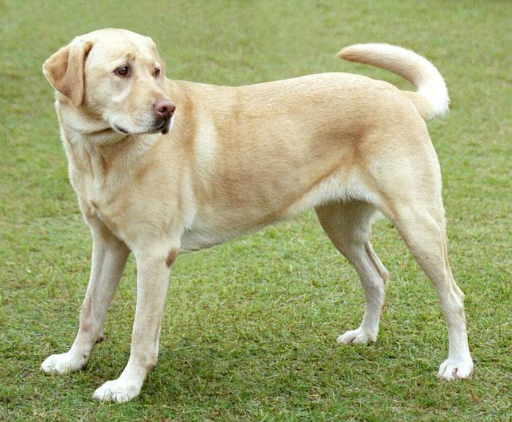

In [25]:
tensor_to_image(image)

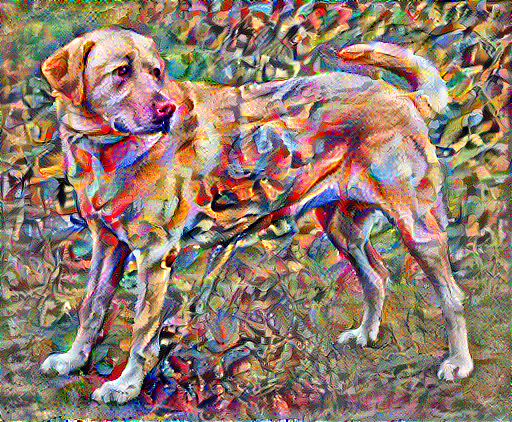

Train step: 1000
Total time: 584.4


In [26]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))
  
end = time.time()
print("Total time: {:.1f}".format(end-start))

### Total Variation Loss

In [27]:
def high_pass_x_y(image):
  x_var = image[:, :, 1:, :] - image[:, :, :-1, :]
  y_var = image[:, 1:, :, :] - image[:, :-1, :, :]

  return x_var, y_var

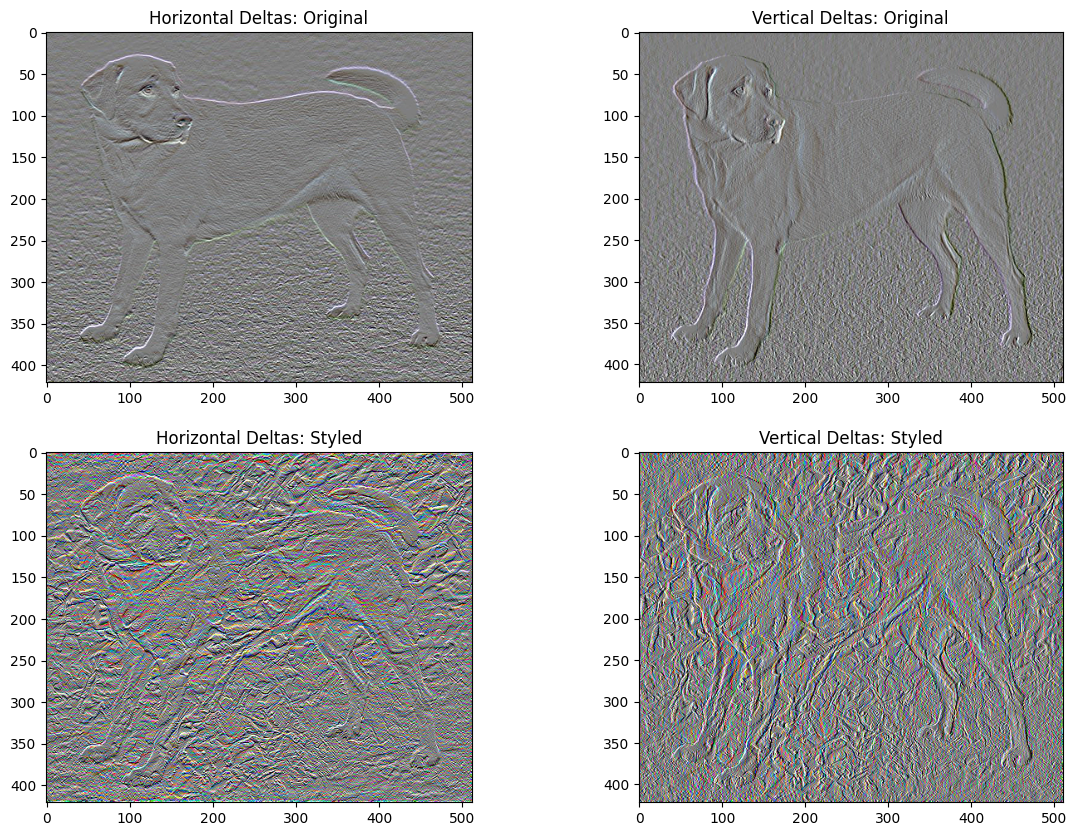

In [28]:
x_deltas, y_deltas = high_pass_x_y(content_image)

plt.figure(figsize=(14, 10))
plt.subplot(2, 2, 1)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Original")

plt.subplot(2, 2, 2)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Original")

x_deltas, y_deltas = high_pass_x_y(image)

plt.subplot(2, 2, 3)
imshow(clip_0_1(2*y_deltas+0.5), "Horizontal Deltas: Styled")

plt.subplot(2, 2, 4)
imshow(clip_0_1(2*x_deltas+0.5), "Vertical Deltas: Styled")

In [29]:
def total_variation_loss(image):
  x_deltas, y_deltas = high_pass_x_y(image)
  return tf.reduce_sum(tf.abs(x_deltas)) + tf.reduce_sum(tf.abs(y_deltas))

In [30]:
total_variation_loss(image).numpy()

149392.48

In [31]:
tf.image.total_variation(image).numpy()

array([149392.48], dtype=float32)

In [32]:
total_variation_weight=30

In [33]:
@tf.function()
def train_step(image):
  with tf.GradientTape() as tape:
    outputs = extractor(image)
    loss = style_content_loss(outputs)
    loss += total_variation_weight*tf.image.total_variation(image)

  grad = tape.gradient(loss, image)
  opt.apply_gradients([(grad, image)])
  image.assign(clip_0_1(image))

In [34]:
opt = tf.keras.optimizers.Adam(learning_rate=0.02, beta_1=0.99, epsilon=1e-1)
image = tf.Variable(content_image)

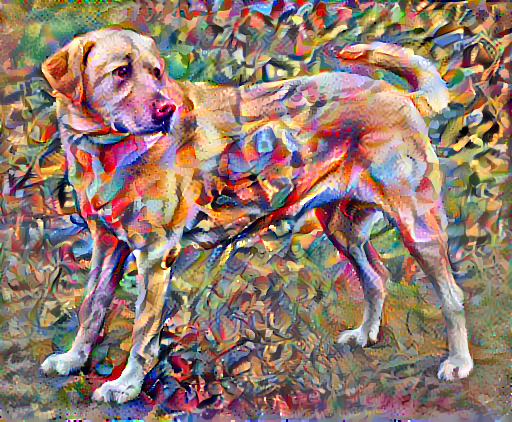

Train step: 1000
Total time: 587.6


In [35]:
import time
start = time.time()

epochs = 10
steps_per_epoch = 100

step = 0
for n in range(epochs):
  for m in range(steps_per_epoch):
    step += 1
    train_step(image)
    print(".", end='', flush=True)
  display.clear_output(wait=True)
  display.display(tensor_to_image(image))
  print("Train step: {}".format(step))

end = time.time()
print("Total time: {:.1f}".format(end-start))

In [36]:
file_name = 'stylized-image.png'
tensor_to_image(image).save(file_name)

try:
  from google.colab import files
  files.download(file_name)
except (ImportError, AttributeError):
  pass